In [1]:
from IPython.display import display, Image
from pprint import pprint
import json

from ginv import *
sympy.init_printing()

The database of polynomial systems.

The demonstration database is an essential part of PHCpack

http://homepages.math.uic.edu/~jan/

In [2]:
with open('poly_exmpl.json', 'r') as f:
      poly_exmpl = json.loads(f.read())

In [3]:
" ".join(sorted(poly_exmpl.keys()))

'Popov19 Popov20 Popov21 Popov23 Popov24 Popov25 assur44 aubry2 augot benchmark_D1 benchmark_i1 boon butcher butcher8 butemb3 camera1s caprasse cassou chandra4 chandra5 chandra6 chemequ chemequs chemkin cohn2 cohn3 comb3000 comb3000s conform1 cpdm5 cyc8emb1 cyclic10 cyclic11 cyclic5 cyclic6 cyclic7 cyclic8 cyclic9 d1 des18_3 des22_24 dessin1 dessin2 discret3 discret3s dl ducos10 ducos7_3 ducos7_5 ducos8 eco10 eco11 eco12 eco5 eco6 eco7 eco8 eco9 el44 el50 extcyc4 extcyc5 extcyc6 extcyc7 extcyc8 f633 f744 f855 f966 fabrice24 fbremb2 fbrfive12 fbrfive4 filter9 fourbar game4two game5two game6two game7two gaukwa2 gaukwa3 gaukwa4 geneig hairer1 hairer2 hairer3 hairer4 hawes4 hcyclic5 hcyclic6 hcyclic7 hcyclic8 heart hemmecke hf744 hf855 hietarinta1 hunecke i1 ilias12 ilias13 ilias_k_2 ilias_k_3 ipp ipp2 issac97 jcf26 katsura10 katsura5 katsura6 katsura7 katsura8 katsura9 kin1 kinema kotsireas ku10 lanconelli lichtblau liu lorentz lumped matrix mckay mckay.gls50mod mickey morgenstern noon3 n

In [4]:
" ".join(sorted(k for k, v in poly_exmpl.items()\
    if len(v['eqs']) < 6))

'caprasse cassou chandra4 chandra5 chemequ chemequs cohn2 cohn3 conform1 cpdm5 cyclic5 eco5 extcyc4 fbrfive4 fourbar game4two game5two gaukwa2 hcyclic5 hemmecke issac97 lanconelli lichtblau liu lorentz lumped mickey morgenstern noon3 noon4 noon5 pb601 pb601es pb601vs proddeco quadfor2 quadgrid redcyc5 redeco5 rediff3 reimer4 reimer5 rose sendra solotarev sparse5 speer test utbikker uteshev_bikker vermeer vernov1 wang16 wood wright'

In [5]:
ex = poly_exmpl['issac97']
ex

{'eqs': ['8*w**2+5*x*w+2*z*w+3*w+5*x**2+7*y**2+7*z**2-7*x+2*x*y-7*y-4*w*y-8*z-7*x*z-8*y*z+8',
  '3*w**2+9*w+4*x**2+9*y**2+7*z**2+7*x-5*w*x+2*x*y+5*y-3*w*y+6*y*z+7*z-6*w*z-2*x*z+5',
  '-2*w**2+9*x*w+9*y*w+8*x**2+6*y**2-4*w+8*x+9*x*y+4*y+8*z-7*w*z-3*x*z-7*y*z-6*z**2+2',
  '7*w**2+5*x*w+3*y*w+2*x**2-5*w+4*x+9*x*y+6*y-4*y**2-9*z-5*w*z-7*x*z-5*y*z-4*z**2+2'],
 'var': ['x', 'y', 'z', 'w'],
 'HP': '16',
 'DESCRIPTION': 'From http://www.wolfram.comm/new/issac\nISSAC System Challenge 1997\n\nGoal: compute a lexico gbasis'}

prolong 0, Q 2
x**2
prolong 0, Q 2
x*y, y**2, x*z
prolong 2, Q 0
y*z**2, z**3, y*z*w, z**2*w
prolong 3, Q 0
x*w**3, y*w**3, z*w**3
prolong 4, Q 0
w**5
prolong 5, Q 0
prolong 0, Q 0
crit1: 0
crit2: 0
 time: 0.35 sec
    count: 12
reduction: 535
       HP: 16


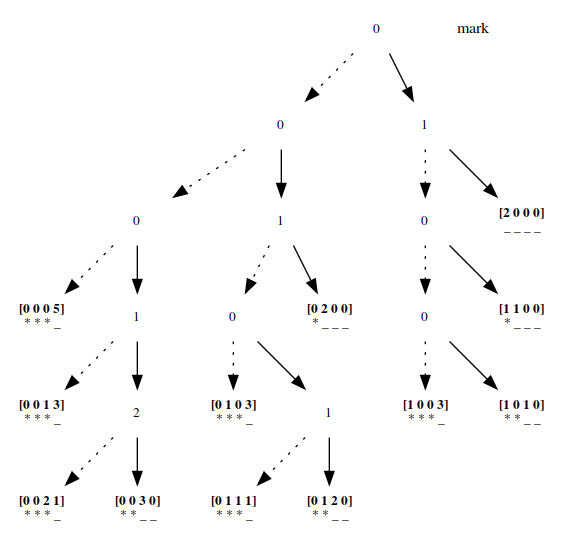

In [6]:
Monom.cmp = Monom.TOPdeglex
var = ex['var']
fun = []
Monom.init(var, fun)
for var_i, var_g in enumerate(var):
    globals()[var_g] = Poly(Monom(var_i))
# invdiv = JanetCache()
invdiv = Janet()
res = ginvBlockLow([eval(eq) for eq in ex['eqs']], \
invdiv, level=3)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {invdiv.count()}")
print(f"reduction: {invdiv.reduction()}")
print(f"       HP: {invdiv.HP()}")
invdiv.saveImage('invdiv.pdf', level=1)
invdiv.saveImage('invdiv.png', level=1)
Image('./invdiv.png')